## Предсказание цен на недвижимость

### Импорт модулей и загрузка датасетов

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 41
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/home/demiorca/Документы/Data_Science_Project_Work/input/train.csv')

In [3]:
test = pd.read_csv('/home/demiorca/Документы/Data_Science_Project_Work/input/test.csv')

In [4]:
data.set_index('Id', inplace = True)
test.set_index('Id', inplace = True)

In [5]:
data['DistrictId'] = data['DistrictId'].astype(str)
test['DistrictId'] = test['DistrictId'].astype(str)

In [6]:
data.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                     
14038         35    2.0  47.981561   29.442751            6.0      7   
15053         41    3.0  65.683640   40.049543            8.0      7   
4765          53    2.0  44.947953   29.197612            0.0      8   
5809          58    2.0  53.352981   52.731512            9.0      8   
10783         99    1.0  39.649192   23.776169            7.0     11   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
14038         9.0       1969   0.089040         B         B        33   
15053         9.0       1978   0.000070         B         B        46   
4765         12.0       1968   0.049637         B         B        34   
5809         17.0       1977   0.437885         B         B        23   
10783        12.0       1976   0.012339         B         B        35   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
14038      7976         5           NaN            0       11       B   
15053     10309         1         240.0            1       16       B   
4765       7759         0         229.0            1        3       B   
5809       5735         3        1084.0            0        5       B   
10783      5776         1        2078.0            2        4       B   

               Price  
Id                    
14038  184966.930730  
15053  300009.450063  
4765   220925.908524  
5809   175616.227217  
10783  150226.531644

In [7]:
test.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                     
725           58    2.0  49.882643   33.432782            6.0      6   
15856         74    2.0  69.263183         NaN            1.0      6   
5480         190    1.0  13.597819   15.948246           12.0      2   
15664         47    2.0  73.046609   51.940842            9.0     22   
14275         27    1.0  47.527111   43.387569            1.0     17   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
725          14.0       1972   0.310199         B         B        11   
15856         1.0       1977   0.075779         B         B         6   
5480          5.0       1909   0.000000         B         B        30   
15664        22.0       2007   0.101872         B         B        23   
14275        17.0       2017   0.072158         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
Id                                                                     
725        2748         1           NaN            0        0       B  
15856      1437         3           NaN            0        2       B  
5480       7538        87        4702.0            5        5       B  
15664      4583         3           NaN            3        3       B  
14275       629         1           NaN            0        0       A

### Описание датасета

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [9]:
data.describe()

Rooms        Square   LifeSquare  KitchenSquare         Floor  \
count  10000.000000  10000.000000  7887.000000   10000.000000  10000.000000   
mean       1.890500     56.315775    37.199645       6.273300      8.526700   
std        0.839512     21.058732    86.241209      28.560917      5.241148   
min        0.000000      1.136859     0.370619       0.000000      1.000000   
25%        1.000000     41.774881    22.769832       1.000000      4.000000   
50%        2.000000     52.513310    32.781260       6.000000      7.000000   
75%        2.000000     65.900625    45.128803       9.000000     12.000000   
max       19.000000    641.065193  7480.592129    2014.000000     42.000000   

         HouseFloor     HouseYear     Ecology_1      Social_1      Social_2  \
count  10000.000000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean      12.609400  3.990166e+03      0.118858     24.687000   5352.157400   
std        6.775974  2.005003e+05      0.119025     17.532614   4006.799803   
min        0.000000  1.910000e+03      0.000000      0.000000    168.000000   
25%        9.000000  1.974000e+03      0.017647      6.000000   1564.000000   
50%       13.000000  1.977000e+03      0.075424     25.000000   5285.000000   
75%       17.000000  2.001000e+03      0.195781     36.000000   7227.000000   
max      117.000000  2.005201e+07      0.521867     74.000000  19083.000000   

           Social_3  Healthcare_1   Helthcare_2       Shops_1          Price  
count  10000.000000   5202.000000  10000.000000  10000.000000   10000.000000  
mean       8.039200   1142.904460      1.319500      4.231300  214138.857399  
std       23.831875   1021.517264      1.493601      4.806341   92872.293865  
min        0.000000      0.000000      0.000000      0.000000   59174.778028  
25%        0.000000    350.000000      0.000000      1.000000  153872.633942  
50%        2.000000    900.000000      1.000000      3.000000  192269.644879  
75%        5.000000   1548.000000      2.000000      6.000000  249135.462171  
max      141.000000   4849.000000      6.000000     23.000000  633233.466570

Text(0.5, 1.0, 'Целевая переменная')

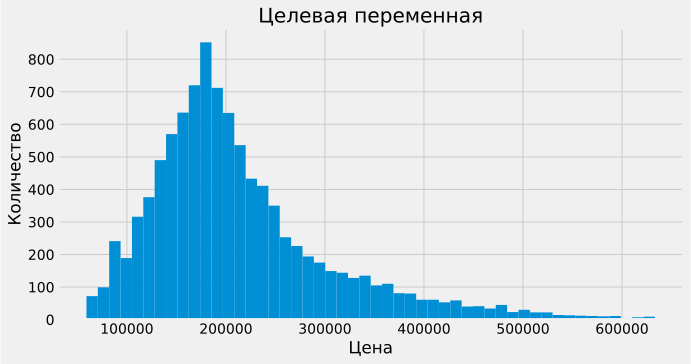

In [10]:
plt.figure(figsize = (10, 5))

data['Price'].hist(bins=50)
plt.ylabel('Количество')
plt.xlabel('Цена')
plt.title('Целевая переменная')

### Удаление признака healthcare_1 и добавление дополнительных признаков

In [11]:
healthcare_1_drop = data.drop('Healthcare_1', axis = 1).rename(columns = {'Helthcare_2': 'Healthcare'})

In [12]:
def drop_healthcare_1_drop(df, healthcare_1_drop):
    df = df.drop('Healthcare_1', axis = 1).rename(columns = {'Helthcare_2': 'Healthcare'})
    return df

In [13]:
data = drop_healthcare_1_drop(data, healthcare_1_drop)

In [14]:
distr_info = data['DistrictId'].value_counts().reset_index()\
                               .rename(columns = {'index': 'DistrictId', 'DistrictId': 'District_Qty'})

In [15]:
distr_info['Is_Large'] = (distr_info['District_Qty'] > 100).astype(int)

In [16]:
def add_distr_info(df, distr_info):
    df = pd.merge(df, distr_info, on = 'DistrictId', how = 'left').set_index(df.index)
    df['Is_Large'] = df['Is_Large'].fillna(0)
    df['District_Qty'] = df['District_Qty'].fillna(1)
    return df

In [17]:
data = add_distr_info(data, distr_info)

In [18]:
stat_dr = data.groupby(['DistrictId', 'Rooms'], as_index = False)[['Price']]\
              .median().rename(columns = {'Price': 'Median_Price_Dr'})

In [19]:
stat_r = data.groupby('Rooms', as_index = False)[['Price']].median().rename(columns={'Price': 'Median_Price_R'})

In [20]:
median_price = data['Price'].median()

In [21]:
def add_median_price(df, stat_dr, stat_r, median_price):
    df = pd.merge(df, stat_dr, on = ['DistrictId', 'Rooms'], how = 'left').set_index(df.index)
    df = pd.merge(df, stat_r, on = 'Rooms', how = 'left').set_index(df.index)
    df['Median_Price_R'] = df['Median_Price_R'].fillna(median_price)
    df['Median_Price_Dr'] = df['Median_Price_Dr'].fillna(df['Median_Price_R'])
    return df

In [22]:
data = add_median_price(data, stat_dr, stat_r, median_price)

In [23]:
median_square = data.groupby('Rooms', as_index = False)[['Square']]\
                    .median().rename(columns = {'Square': 'Median_Square'})

In [24]:
def add_median_square(df, median_square):
    df = pd.merge(df, median_square, on = 'Rooms', how = 'left').set_index(df.index)
    df.loc[df['Square'].isnull(), 'Square'] = df['Median_Square']
    return df

In [25]:
data = add_median_square(data, median_square)

In [26]:
median_lifesquare = data.groupby('Rooms', as_index = False)[['LifeSquare']]\
                        .median().rename(columns = {'LifeSquare': 'Median_LifeSquare'})

In [27]:
def add_median_lifesquare(df, median_lifesquare):
    df = pd.merge(df, median_lifesquare, on = 'Rooms', how = 'left').set_index(df.index)
    df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Median_LifeSquare']
    return df

In [28]:
data = add_median_lifesquare(data, median_lifesquare)

In [29]:
median_kitchensquare = data.groupby('Rooms', as_index = False)[['KitchenSquare']]\
                           .median().rename(columns = {'KitchenSquare': 'Median_KitchenSquare'})

In [30]:
def add_median_kitchensquare(df, median_kitchensquare):
    df = pd.merge(df, median_kitchensquare, on = 'Rooms', how = 'left').set_index(df.index)
    df.loc[df['KitchenSquare'].isnull(), 'KitchenSquare'] = df['Median_KitchenSquare']
    return df

In [31]:
data = add_median_kitchensquare(data, median_kitchensquare)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DistrictId            10000 non-null  object 
 1   Rooms                 10000 non-null  float64
 2   Square                10000 non-null  float64
 3   LifeSquare            10000 non-null  float64
 4   KitchenSquare         10000 non-null  float64
 5   Floor                 10000 non-null  int64  
 6   HouseFloor            10000 non-null  float64
 7   HouseYear             10000 non-null  int64  
 8   Ecology_1             10000 non-null  float64
 9   Ecology_2             10000 non-null  object 
 10  Ecology_3             10000 non-null  object 
 11  Social_1              10000 non-null  int64  
 12  Social_2              10000 non-null  int64  
 13  Social_3              10000 non-null  int64  
 14  Healthcare            10000 non-null  int64  
 15  Shops_1         

### Обработка выбросов

In [33]:
data.loc[data['HouseYear'] > 2020, :]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                     
10814        109    1.0  37.265070   20.239714            9.0      9   
11607        147    2.0  44.791836   28.360393            5.0      4   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
10814        12.0   20052011   0.136330         B         B        30   
11607         9.0       4968   0.319809         B         B        25   

       Social_2  Social_3  Healthcare  Shops_1 Shops_2          Price  \
Id                                                                      
10814      6141        10           3        6       B  254084.534396   
11607      4756        16           5        8       B  243028.603096   

       District_Qty  Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
Id                                                                              
10814            41         0    246219.241862   154979.497993      40.406590   
11607            15         0    244785.344750   200320.754636      55.841812   

       Median_LifeSquare  Median_KitchenSquare  
Id                                              
10814          21.663929                   6.0  
11607          32.552134                   6.0

In [34]:
def clean_year(df):
    df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2011
    df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968
    return df

In [35]:
data = clean_year(data)

In [36]:
data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

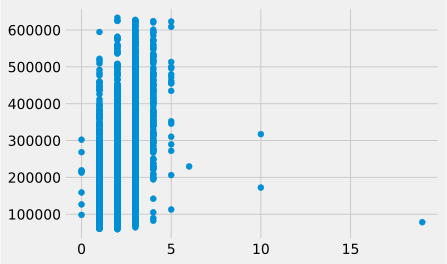

In [37]:
plt.scatter(data['Rooms'], data['Price'])

In [38]:
data['Rooms'].mode()[0]

2.0

In [39]:
data.loc[(data['Rooms'] > 6) | (data['Rooms'] < 1), :]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
5927          57   10.0   59.056975   36.223072           10.0     22   
12638         27    0.0  138.427694  136.215499            0.0      4   
8491           1   19.0   42.006046   21.779288            7.0     17   
7917          27    0.0  212.932361  211.231125            0.0      2   
7317          27    0.0   41.790881   85.125471            0.0     13   
770           28    0.0   49.483501   85.125471            0.0     16   
456            6    0.0   81.491446   85.125471            0.0      4   
3224          27    0.0    2.377248    0.873147            0.0      1   
3159          88    0.0   38.697117   19.345131            9.0      9   
9443          27    0.0   87.762616   85.125471            0.0      5   
14865          9   10.0   60.871266   38.420681           10.0      3   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
5927         22.0       2002   0.090799         B         B        74   
12638         3.0       2016   0.075424         B         B        11   
8491         17.0       2014   0.007122         B         B         1   
7917          3.0       2008   0.211401         B         B         9   
7317          0.0       1977   0.211401         B         B         9   
770           0.0       2015   0.118537         B         B        30   
456           0.0       1977   0.243205         B         B         5   
3224          0.0       1977   0.017647         B         B         2   
3159         16.0       1982   0.127376         B         B        43   
9443         15.0       1977   0.211401         B         B         9   
14865         2.0       1994   0.161532         B         B        25   

       Social_2  Social_3  Healthcare  Shops_1 Shops_2          Price  \
Id                                                                      
5927      19083         2           5       15       B  317265.323792   
12638      3097         0           0        0       B  268394.744389   
8491        264         0           0        1       B   78364.616704   
7917       1892         0           0        1       B  302211.260887   
7317       1892         0           0        1       B   98129.976788   
770        6207         1           1        0       B  217009.338463   
456        1564         0           0        0       B  212864.799112   
3224        469         0           0        0       B  126596.941798   
3159       8429         3           3        9       B  158998.110646   
9443       1892         0           0        1       B  219281.918007   
14865      5648         1           2        4       B  172329.270863   

       District_Qty  Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
Id                                                                              
5927            107         1    317265.323792   244797.297328      59.964120   
12638           851         1    219281.918007   214937.068787      65.487474   
8491            652         1     78364.616704    78364.616704      42.006046   
7917            851         1    219281.918007   214937.068787      65.487474   
7317            851         1    219281.918007   214937.068787      65.487474   
770              79         0    217009.338463   214937.068787      65.487474   
456             511         1    212864.799112   214937.068787      65.487474   
3224            851         1    219281.918007   214937.068787      65.487474   
3159             64         0    158998.110646   214937.068787      65.487474   
9443            851         1    219281.918007   214937.068787      65.487474   
14865           294         1    172329.270863   244797.297328      59.964120   

       Median_LifeSquare  Median_KitchenSquare  
Id                                              
5927

In [40]:
def clean_rooms(df):
    df.loc[df['Rooms'] > 6, 'Rooms'] = df['Rooms'].mode()[0]
    df.loc[df['Rooms'] < 1, 'Rooms'] = df['Rooms'].mode()[0]
    return df

In [41]:
data = clean_rooms(data)

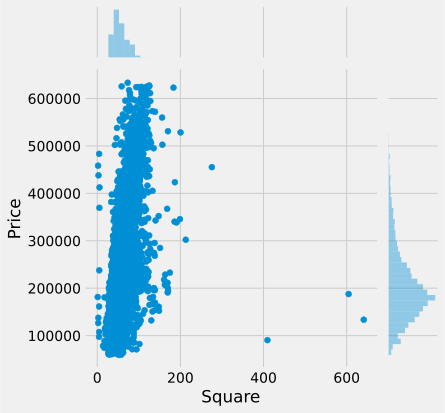

In [42]:
sns.jointplot(data['Square'], data['Price'], kind = 'scatter', height = 6)

In [43]:
data.loc[data['Square'] < 10, :]

DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                    
1748          88    2.0  5.497061   67.628717            1.0     24   
11526         27    1.0  4.633498    1.969969            1.0     18   
10202          6    1.0  2.596351    4.604943            1.0      3   
10527         27    1.0  4.380726   40.805837            1.0     10   
9487           5    1.0  5.129222    5.549458            1.0      1   
3224          27    2.0  2.377248    0.873147            0.0      1   
4504          27    3.0  4.390331    5.610772            1.0      8   
14786          1    1.0  1.136859    4.525736            1.0      3   
13265          1    3.0  4.823679   79.767964            0.0      6   
15744         34    1.0  1.988943    2.642219            1.0     21   
6782          45    1.0  2.954309    5.257278            1.0      3   
7657          38    1.0  4.502784    4.618547            1.0     28   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
1748         22.0       1977   0.127376         B         B        43   
11526         1.0       1977   0.011654         B         B         4   
10202        25.0       2014   0.243205         B         B         5   
10527        17.0       2013   0.211401         B         B         9   
9487          1.0       1977   0.150818         B         B        16   
3224          0.0       1977   0.017647         B         B         2   
4504         19.0       2016   0.211401         B         B         9   
14786         1.0       1977   0.007122         B         B         1   
13265        17.0       1977   0.007122         B         B         1   
15744         4.0       1977   0.069753         B         B        53   
6782          1.0       1977   0.195781         B         B        23   
7657          1.0       1977   0.060753         B         B        15   

       Social_2  Social_3  Healthcare  Shops_1 Shops_2          Price  \
Id                                                                      
1748       8429         3           3        9       B  412511.088764   
11526       915         0           0        0       B  107604.269441   
10202      1564         0           0        0       B  137597.601458   
10527      1892         0           0        1       B   97560.720383   
9487       3433         4           4        5       B  369472.403061   
3224        469         0           0        0       B  126596.941798   
4504       1892         0           0        1       B  161379.067034   
14786       264         0           0        1       B  181434.825589   
13265       264         0           0        1       B  237716.681261   
15744     13670         4           1       11       B  458378.777006   
6782       5212         6           3        2       B  438005.182323   
7657       2787         2           0        7       B  483283.488083   

       District_Qty  Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
Id                                                                              
1748             64         0    207588.167507   200320.754636      55.841812   
11526           851         1    118327.090620   154979.497993      40.406590   
10202           511         1    130636.710519   154979.497993      40.406590   
10527           851         1    118327.090620   154979.497993      40.406590   
9487             34         0    226173.529684   154979.497993      40.406590   
3224            851         1    219281.918007   214937.068787      65.487474   
4504            851         1    213530.788443   268723.157677      77.413643   
14786           652         1    146735.671740   154979.497993      40.406590   
13265           652         1    244005.272380   268723.157677      77.413643   
15744           111         1    195428.256849   154979.497993      40.406

In [44]:
data.loc[data['Square'] > 400, :]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
28             9    2.0  604.705972   32.552134            1.0     17   
2307         102    1.0  409.425181  410.639749           10.0      4   
11602         30    2.0  641.065193  638.163193           10.0     20   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
28           18.0       1977   0.161532         B         B        25   
2307          4.0       2016   0.238617         B         B        26   
11602        19.0       2019   0.000078         B         B        22   

       Social_2  Social_3  Healthcare  Shops_1 Shops_2          Price  \
Id                                                                      
28         5648         1           2        4       B  187717.242538   
2307       3889         6           3        6       B   90470.430830   
11602      6398       141           3       23       B  133529.681562   

       District_Qty  Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
Id                                                                              
28              294         1    187858.706484   200320.754636      55.841812   
2307              8         0     84250.557673   154979.497993      40.406590   
11602           228         1    177914.715788   200320.754636      55.841812   

       Median_LifeSquare  Median_KitchenSquare  
Id                                              
28             32.552134                   6.0  
2307           21.663929                   6.0  
11602          32.552134                   6.0

In [45]:
# data.loc[(data['Rooms'] == 1) & (data['Square'] > 70), :] для поиска неточностей

In [46]:
# data.loc[(data['Rooms'] == 2) & (data['Square'] > 90), :] для поиска неточностей

In [47]:
# data.loc[(data['Rooms'] == 3) & (data['Square'] > 110), :] для поиска неточностей

In [48]:
# data.loc[(data['Rooms'] == 4) & (data['Square'] > 130), :] для поиска неточностей

In [49]:
# data.loc[(data['Rooms'] == 5) & (data['Square'] > 150), :] для поиска неточностей

In [50]:
# data.loc[(data['Rooms'] == 6) & (data['Square'] > 170), :] для поиска неточностей

In [51]:
# data.loc[(data['Rooms'] == 2) & (data['Square'] < 20), :] для поиска неточностей

In [52]:
# data.loc[(data['Rooms'] == 3) & (data['Square'] < 40), :] для поиска неточностей

In [53]:
# data.loc[(data['Rooms'] == 4) & (data['Square'] < 60), :] для поиска неточностей

In [54]:
# data.loc[(data['Rooms'] == 5) & (data['Square'] < 80), :] для поиска неточностей

In [55]:
# data.loc[(data['Rooms'] == 6) & (data['Square'] < 90), :] для поиска неточностей

In [56]:
def clean_square(df):
    df.loc[df['Square'] < 10, 'Square'] = df['Median_Square']
    df.loc[df['Square'] > 400, 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 1) & (df['Square'] > 70), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 2) & (df['Square'] > 90), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 3) & (df['Square'] > 110), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 4) & (df['Square'] > 130), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 5) & (df['Square'] > 150), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 6) & (df['Square'] > 170), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 1) & (df['Square'] < 10), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 2) & (df['Square'] < 20), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 3) & (df['Square'] < 40), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 4) & (df['Square'] < 60), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 5) & (df['Square'] < 80), 'Square'] = df['Median_Square']
    df.loc[(df['Rooms'] == 6) & (df['Square'] < 90), 'Square'] = df['Median_Square']
    return df

In [57]:
data = clean_square(data)

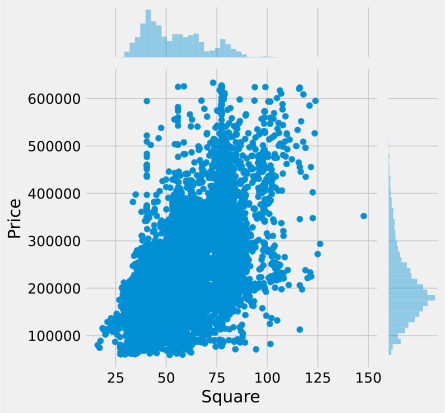

In [58]:
sns.jointplot(data['Square'], data['Price'], kind = 'scatter', height = 6)

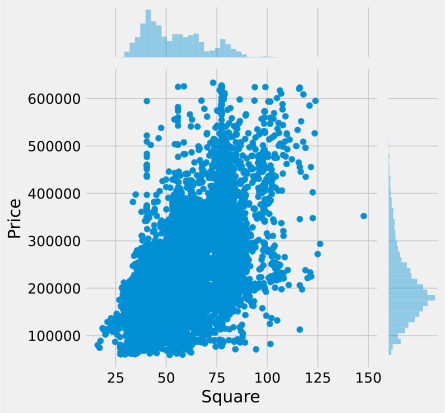

In [59]:
sns.jointplot(data['Square'], data['Price'], kind = 'scatter', height = 6)

In [60]:
# data.loc[(data['Rooms'] == 1) & (data['LifeSquare'] < 10), :] для поиска неточностей

In [61]:
# data.loc[(data['Rooms'] == 2) & (data['LifeSquare'] < 20), :] для поиска неточностей

In [62]:
# data.loc[(data['Rooms'] == 3) & (data['LifeSquare'] < 30), :] для поиска неточностей

In [63]:
# data.loc[(data['Rooms'] == 4) & (data['LifeSquare'] < 40), :] для поиска неточностей

In [64]:
# data.loc[(data['Rooms'] == 5) & (data['LifeSquare'] < 50), :] для поиска неточностей

In [65]:
# data.loc[(data['Rooms'] == 6) & (data['LifeSquare'] < 60), :] для поиска неточностей

In [66]:
# data.loc[(data['Rooms'] == 1) & (data['LifeSquare'] > 50), :] для поиска неточностей

In [67]:
# data.loc[(data['Rooms'] == 2) & (data['LifeSquare'] > 70), :] для поиска неточностей

In [68]:
# data.loc[(data['Rooms'] == 3) & (data['LifeSquare'] > 90), :] для поиска неточностей

In [69]:
# data.loc[(data['Rooms'] == 4) & (data['LifeSquare'] > 110), :] для поиска неточностей

In [70]:
# data.loc[(data['Rooms'] == 5) & (data['LifeSquare'] > 130), :] для поиска неточностей

In [71]:
# data.loc[(data['Rooms'] == 6) & (data['LifeSquare'] > 150), :] для поиска неточностей

In [72]:
def clean_lifesquare_1(df):
    df.loc[(df['Rooms'] == 1) & (df['LifeSquare'] < 10), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 2) & (df['LifeSquare'] < 20), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 3) & (df['LifeSquare'] < 30), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 4) & (df['LifeSquare'] < 40), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 5) & (df['LifeSquare'] < 50), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 6) & (df['LifeSquare'] < 60), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 1) & (df['LifeSquare'] > 50), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 2) & (df['LifeSquare'] > 70), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 3) & (df['LifeSquare'] > 90), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 4) & (df['LifeSquare'] > 110), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 5) & (df['LifeSquare'] > 130), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[(df['Rooms'] == 6) & (df['LifeSquare'] > 150), 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Median_LifeSquare']
    df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Median_LifeSquare']
    return df

In [73]:
data = clean_lifesquare_1(data)

In [74]:
data.loc[data['Square'] < data['LifeSquare'], 'Square']

Id
2748     46.388203
12638    65.487474
11388    46.923652
7917     65.487474
7317     41.790881
15127    17.046188
770      49.483501
456      81.491446
3224     65.487474
3104     32.533803
4352     28.517666
3159     38.697117
8162     46.295821
3761     46.500341
6927     16.117154
5913     44.418467
11554    45.389323
Name: Square, dtype: float64

In [75]:
def clean_lifesquare_2(df):
    df.loc[df['Square'] < df['LifeSquare'], 'Square'] = df['LifeSquare'] + (df['LifeSquare'] / 100 * 10)
    return df

In [76]:
data = clean_lifesquare_2(data)

In [77]:
data.loc[data['KitchenSquare'] + data['LifeSquare'] > data['Square'], :]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
5809          58    2.0   53.352981   52.731512            9.0      8   
7596          23    1.0   47.080100   46.807989           12.0      3   
6925          27    2.0   64.929103   63.304605           10.0     15   
14787         34    2.0   60.366626   57.709149           10.0     20   
4747           7    3.0   81.467909   76.646182           10.0     19   
...          ...    ...         ...         ...            ...    ...   
12918         23    2.0   51.440463   32.552134           51.0      3   
2737          27    3.0   77.413643   46.960480          123.0      5   
4497           1    1.0   38.330353   38.010046            8.0      7   
14904         34    4.0  104.049130   99.788387           10.0      8   
2159          30    1.0   33.227093   32.639166            1.0      4   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
5809         17.0       1977   0.437885         B         B        23   
7596          9.0       1977   0.014073         B         B         2   
6925         17.0       2016   0.072158         B         B         2   
14787        19.0       2017   0.069753         B         B        53   
4747         17.0       2010   0.035145         B         B        42   
...           ...        ...        ...       ...       ...       ...   
12918        17.0       2017   0.005767         B         B         1   
2737         10.0       2015   0.017647         B         B         2   
4497         17.0       1991   0.025609         B         B        33   
14904        25.0       2018   0.069753         B         B        53   
2159          4.0       2016   0.000078         B         B        22   

       Social_2  Social_3  Healthcare  Shops_1 Shops_2          Price  \
Id                                                                      
5809       5735         3           0        5       B  175616.227217   
7596        475         0           0        0       B   96029.167877   
6925        629         1           0        0       A  228584.001072   
14787     13670         4           1       11       B  241737.808497   
4747       9292         3           0        3       B  477665.582915   
...         ...       ...         ...      ...     ...            ...   
12918       388         0           0        0       B   88150.012510   
2737        469         0           0        0       B  234194.837047   
4497       5261         0           3        1       B   97464.327338   
14904     13670         4           1       11       B  411971.106869   
2159       6398       141           3       23       B   65949.315881   

       District_Qty  Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
Id                                                                              
5809            179         1    166809.665642   200320.754636      55.841812   
7596            565         1    102069.270740   154979.497993      40.406590   
6925            851         1    165683.084779   200320.754636      55.841812   
14787           111         1    262469.686211   200320.754636      55.841812   
4747             92         0    320872.644899   268723.157677      77.413643   
...             ...       ...              ...             ...            ...   
12918           565         1    142883.014837   200320.754636      55.841812   
2737            851         1    213530.788443   268723.157677      77.413643   
4497            652         1    146735.671740   154979.497993      40.406590   
14904           111         1    372414.627508   377524.231990      98.668054   
2159            228         1    128649.191084   154979.497993      40.406590   

       Median_LifeSquare  Median_KitchenSquare  
Id                                              
5809

In [78]:
def clean_kitchensquare_1(df):
    df.loc[df['KitchenSquare'] + df['LifeSquare'] > df['Square'], 'KitchenSquare'] = df['Median_KitchenSquare']
    return df

In [79]:
data = clean_kitchensquare_1(data)

In [80]:
data.loc[data['KitchenSquare'] + data['LifeSquare'] > data['Square'], :]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
5809          58    2.0   53.352981   52.731512            6.0      8   
7596          23    1.0   47.080100   46.807989            6.0      3   
6925          27    2.0   64.929103   63.304605            6.0     15   
14787         34    2.0   60.366626   57.709149            6.0     20   
4747           7    3.0   81.467909   76.646182            7.0     19   
...          ...    ...         ...         ...            ...    ...   
15304        124    1.0   45.220099   44.240841            6.0     12   
10318          6    1.0   40.631541   38.750052            6.0      5   
4497           1    1.0   38.330353   38.010046            6.0      7   
14904         34    4.0  104.049130   99.788387            9.0      8   
2159          30    1.0   33.227093   32.639166            6.0      4   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
5809         17.0       1977   0.437885         B         B        23   
7596          9.0       1977   0.014073         B         B         2   
6925         17.0       2016   0.072158         B         B         2   
14787        19.0       2017   0.069753         B         B        53   
4747         17.0       2010   0.035145         B         B        42   
...           ...        ...        ...       ...       ...       ...   
15304        12.0       1974   0.122090         B         B        29   
10318        17.0       2013   0.243205         B         B         5   
4497         17.0       1991   0.025609         B         B        33   
14904        25.0       2018   0.069753         B         B        53   
2159          4.0       2016   0.000078         B         B        22   

       Social_2  Social_3  Healthcare  Shops_1 Shops_2          Price  \
Id                                                                      
5809       5735         3           0        5       B  175616.227217   
7596        475         0           0        0       B   96029.167877   
6925        629         1           0        0       A  228584.001072   
14787     13670         4           1       11       B  241737.808497   
4747       9292         3           0        3       B  477665.582915   
...         ...       ...         ...      ...     ...            ...   
15304      6566         7           4        0       B  180351.773573   
10318      1564         0           0        0       B  131271.924425   
4497       5261         0           3        1       B   97464.327338   
14904     13670         4           1       11       B  411971.106869   
2159       6398       141           3       23       B   65949.315881   

       District_Qty  Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
Id                                                                              
5809            179         1    166809.665642   200320.754636      55.841812   
7596            565         1    102069.270740   154979.497993      40.406590   
6925            851         1    165683.084779   200320.754636      55.841812   
14787           111         1    262469.686211   200320.754636      55.841812   
4747             92         0    320872.644899   268723.157677      77.413643   
...             ...       ...              ...             ...            ...   
15304            43         0    180351.773573   154979.497993      40.406590   
10318           511         1    130636.710519   154979.497993      40.406590   
4497            652         1    146735.671740   154979.497993      40.406590   
14904           111         1    372414.627508   377524.231990      98.668054   
2159            228         1    128649.191084   154979.497993      40.406590   

       Median_LifeSquare  Median_KitchenSquare  
Id                                              
5809

In [81]:
def clean_kitchensquare_2(df):
    df.loc[df['KitchenSquare'] + df['LifeSquare'] > df['Square'], 'KitchenSquare'] = df['Square'] - df['LifeSquare']
    return df

In [82]:
data = clean_kitchensquare_2(data)

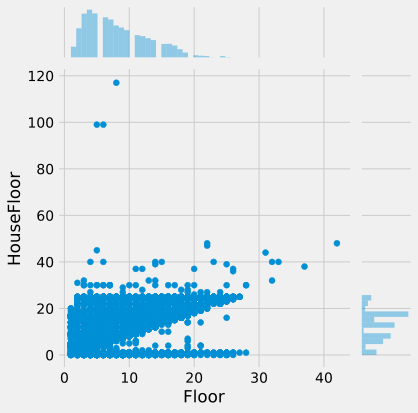

In [83]:
sns.jointplot(data['Floor'], data['HouseFloor'], kind = 'scatter', height = 6)

In [84]:
data.loc[data['HouseFloor'] > 60, :]

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                     
10806          5    1.0  51.944587   48.709601            1.0      6   
9300          74    2.0  71.747869   32.552134            9.0      5   
78            30    2.0  65.773749   32.552134            1.0      8   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
10806        99.0       1977   0.150818         B         B        16   
9300         99.0       1977   0.075779         B         B         6   
78          117.0       1977   0.000078         B         B        22   

       Social_2  Social_3  Healthcare  Shops_1 Shops_2          Price  \
Id                                                                      
10806      3433         4           4        5       B  296127.115515   
9300       1437         3           0        2       B  243329.912579   
78         6398       141           3       23       B  207248.370520   

       District_Qty  Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
Id                                                                              
10806            34         0    226173.529684   154979.497993      40.406590   
9300            114         1    243031.695525   200320.754636      55.841812   
78              228         1    177914.715788   200320.754636      55.841812   

       Median_LifeSquare  Median_KitchenSquare  
Id                                              
10806          21.663929                   6.0  
9300           32.552134                   6.0  
78             32.552134                   6.0

In [85]:
data.loc[data['HouseFloor'] < data['Floor'], :]

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                      
11993         74    2.0   80.312926   32.552134            0.0     14   
10953         27    1.0   53.769097   21.663929            1.0      5   
2119          27    2.0   49.360648   31.993964            5.0      6   
11935         27    2.0   64.711835   32.552134            1.0     15   
6641          54    3.0   77.413643   46.960480            0.0      2   
...          ...    ...         ...         ...            ...    ...   
2237          52    3.0   64.074977   47.633428            6.0     11   
16159         27    1.0   38.968338   21.663929            1.0     10   
4145          96    3.0   90.055233   47.860231           11.0     26   
11553          3    3.0  101.622794   51.628780           12.0     18   
77            32    2.0   50.401785   30.476203            5.0      6   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
11993         0.0       1977   0.075779         B         B         6   
10953         4.0       1977   0.072158         B         B         2   
2119          5.0       1983   0.051815         B         B         5   
11935         1.0       1977   0.211401         B         B         9   
6641          0.0       1977   0.006076         B         B        30   
...           ...        ...        ...       ...       ...       ...   
2237          9.0       1983   0.371149         B         B        34   
16159         1.0       1977   0.211401         B         B         9   
4145         24.0       2005   0.041116         B         B        53   
11553        17.0       2000   0.265089         B         B        37   
77            5.0       1968   0.135650         B         B        46   

       Social_2  Social_3  Healthcare  Shops_1 Shops_2          Price  \
Id                                                                      
11993      1437         3           0        2       B  221244.156664   
10953       629         1           0        0       A  140647.565937   
2119       1227         0           0        0       B  117000.381287   
11935      1892         0           0        1       B  127200.026511   
6641       5285         0           6        6       B  571069.052600   
...         ...       ...         ...      ...     ...            ...   
2237       7065         1           2        5       B  226434.880156   
16159      1892         0           0        1       B   95529.569405   
4145      14892         4           1        4       B  441108.911237   
11553      5288         0           3        2       B  212883.501504   
77         7960         6           3       11       B  196684.316040   

       District_Qty  Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
Id                                                                              
11993           114         1    243031.695525   200320.754636      55.841812   
10953           851         1    118327.090620   154979.497993      40.406590   
2119            851         1    165683.084779   200320.754636      55.841812   
11935           851         1    165683.084779   200320.754636      55.841812   
6641             37         0    491296.245173   268723.157677      77.413643   
...             ...       ...              ...             ...            ...   
2237            143         1    204462.983720   268723.157677      77.413643   
16159           851         1    118327.090620   154979.497993      40.406590   
4145             71         0    301993.310097   268723.157677      77.413643   
11553            82         0    238603.972368   268723.157677      77.413643   
77               34         0    233599.115975   200320.754636      55.841812   

       Median_LifeSquare  Median_KitchenSquare  
Id                                              
1199

In [86]:
def clean_housefloor(df):
    df.loc[df['HouseFloor'] > 60, 'HouseFloor'] = df['Floor']
    df.loc[df['HouseFloor'] < df['Floor'], 'HouseFloor'] = df['Floor']
    return df

In [87]:
data = clean_housefloor(data)

### Перевод object-признаков в dummy-переменные

In [88]:
data.select_dtypes(include='object').columns.tolist()

['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [89]:
def get_dummies_var(df):
    df = pd.get_dummies(df, columns = ['Ecology_2', 'Ecology_3', 'Shops_2'])
    return df

In [90]:
data = get_dummies_var(data)

### Создание функции подготовки данных для тестового датасета

In [91]:
def preparation(df, healthcare_1_drop, distr_info, stat_dr, stat_r, median_price,\
                median_square, median_lifesquare, median_kitchensquare):
    df = drop_healthcare_1_drop(df, healthcare_1_drop)
    df = add_distr_info(df, distr_info)
    df = add_median_price(df, stat_dr, stat_r, median_price)
    df = clean_year(df)
    df = clean_rooms(df)
    df = add_median_square(df, median_square)
    df = clean_square(df)
    df = add_median_lifesquare(df, median_lifesquare)
    df = clean_lifesquare_1(df)
    df = clean_lifesquare_2(df)
    df = add_median_kitchensquare(df, median_kitchensquare)
    df = clean_kitchensquare_1(df)
    df = clean_kitchensquare_2(df)
    df = clean_housefloor(df)
    df = get_dummies_var(df)
    return df

### Итоговое описание тренировочного датасета

In [92]:
data.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                     
14038         35    2.0  47.981561   29.442751       6.000000      7   
15053         41    3.0  65.683640   40.049543       8.000000      7   
4765          53    2.0  44.947953   29.197612       0.000000      8   
5809          58    2.0  53.352981   52.731512       0.621469      8   
10783         99    1.0  39.649192   23.776169       7.000000     11   

       HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
Id                                                                      
14038         9.0       1969   0.089040        33      7976         5   
15053         9.0       1978   0.000070        46     10309         1   
4765         12.0       1968   0.049637        34      7759         0   
5809         17.0       1977   0.437885        23      5735         3   
10783        12.0       1976   0.012339        35      5776         1   

       Healthcare  Shops_1          Price  District_Qty  Is_Large  \
Id                                                                  
14038           0       11  184966.930730            22         0   
15053           1       16  300009.450063            87         0   
4765            1        3  220925.908524           174         1   
5809            0        5  175616.227217           179         1   
10783           2        4  150226.531644            97         0   

       Median_Price_Dr  Median_Price_R  Median_Square  Median_LifeSquare  \
Id                                                                         
14038    207786.135836   200320.754636      55.841812          32.552134   
15053    300009.450063   268723.157677      77.413643          46.960480   
4765     263206.223152   200320.754636      55.841812          32.552134   
5809     166809.665642   200320.754636      55.841812          32.552134   
10783    158539.052715   154979.497993      40.406590          21.663929   

       Median_KitchenSquare  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
Id                                                                   
14038                   6.0            0            1            0   
15053                   7.0            0            1            0   
4765                    6.0            0            1            0   
5809                    6.0            0            1            0   
10783                   6.0            0            1            0   

       Ecology_3_B  Shops_2_A  Shops_2_B  
Id                                        
14038            1          0          1  
15053            1          0          1  
4765             1          0          1  
5809             1          0          1  
10783            1          0          1

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DistrictId            10000 non-null  object 
 1   Rooms                 10000 non-null  float64
 2   Square                10000 non-null  float64
 3   LifeSquare            10000 non-null  float64
 4   KitchenSquare         10000 non-null  float64
 5   Floor                 10000 non-null  int64  
 6   HouseFloor            10000 non-null  float64
 7   HouseYear             10000 non-null  int64  
 8   Ecology_1             10000 non-null  float64
 9   Social_1              10000 non-null  int64  
 10  Social_2              10000 non-null  int64  
 11  Social_3              10000 non-null  int64  
 12  Healthcare            10000 non-null  int64  
 13  Shops_1               10000 non-null  int64  
 14  Price                 10000 non-null  float64
 15  District_Qty    

In [94]:
data.describe()

Rooms        Square    LifeSquare  KitchenSquare         Floor  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean       1.888800     55.392736     33.480999       5.505531      8.526700   
std        0.812096     16.934558     12.764828       3.855656      5.241148   
min        1.000000     17.498542     10.651455       0.000000      1.000000   
25%        1.000000     41.700596     21.663929       1.000000      4.000000   
50%        2.000000     52.384562     32.552134       6.000000      7.000000   
75%        2.000000     65.623625     41.919703       8.000000     12.000000   
max        6.000000    147.709302    114.913843      30.000000     42.000000   

         HouseFloor     HouseYear     Ecology_1      Social_1      Social_2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      13.406100   1984.866300      0.118858     24.687000   5352.157400   
std        5.883421     18.412271      0.119025     17.532614   4006.799803   
min        1.000000   1910.000000      0.000000      0.000000    168.000000   
25%        9.000000   1974.000000      0.017647      6.000000   1564.000000   
50%       14.000000   1977.000000      0.075424     25.000000   5285.000000   
75%       17.000000   2001.000000      0.195781     36.000000   7227.000000   
max       48.000000   2020.000000      0.521867     74.000000  19083.000000   

           Social_3    Healthcare       Shops_1          Price  District_Qty  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean       8.039200      1.319500      4.231300  214138.857399    242.306600   
std       23.831875      1.493601      4.806341   92872.293865    268.992652   
min        0.000000      0.000000      0.000000   59174.778028      1.000000   
25%        0.000000      0.000000      1.000000  153872.633942     55.000000   
50%        2.000000      1.000000      3.000000  192269.644879    104.000000   
75%        5.000000      2.000000      6.000000  249135.462171    511.000000   
max      141.000000      6.000000     23.000000  633233.466570    851.000000   

           Is_Large  Median_Price_Dr  Median_Price_R  Median_Square  \
count  10000.000000     10000.000000    10000.000000   10000.000000   
mean       0.506900    211522.822118   201938.197947      55.702712   
std        0.499977     76560.151790    48941.525942      15.047258   
min        0.000000     78364.616704    78364.616704      40.406590   
25%        0.000000    165071.825722   154979.497993      40.406590   
50%        1.000000    195474.299127   200320.754636      55.841812   
75%        1.000000    241068.903045   200320.754636      55.841812   
max        1.000000    624156.003381   455355.638212     116.084861   

       Median_LifeSquare  Median_KitchenSquare   Ecology_2_A   Ecology_2_B  \
count       10000.000000           10000.00000  10000.000000  10000.000000   
mean           32.353018               6.27000      0.009700      0.990300   
std            10.601762               0.57787      0.098015      0.098015   
min            21.663929               0.00000      0.000000      0.000000   
25%            21.663929               6.00000      0.000000      1.000000   
50%            32.552134               6.00000      0.000000      1.000000   
75%            32.552134               6.00000      0.000000      1.000000   
max            85.125471              10.00000      1.000000      1.000000   

        Ecology_3_A   Ecology_3_B     Shops_2_A     Shops_2_B  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean       0.027500      0.972500      0.082500      0.917500  
std        0.163543      0.163543      0.275139      0.275139  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000      1.000000  
50%        0.000000      1.000000      0.000000      1.000000  
75%        0.000000      1.000000      0.000000      1.000000  
max  

### Отбор признаков

In [95]:
data.to_csv('train_prepared.csv')

In [96]:
fts = data.columns
fts.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare',
 'Shops_1',
 'Price',
 'District_Qty',
 'Is_Large',
 'Median_Price_Dr',
 'Median_Price_R',
 'Median_Square',
 'Median_LifeSquare',
 'Median_KitchenSquare',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [97]:
target = ['Price']
fts = ['Square',
       # 'Rooms',
       'LifeSquare',
       'KitchenSquare',
       'Floor',
       'HouseFloor',
       'HouseYear',
       'Ecology_1',
       'Social_1',
       'Social_2',
       'Social_3',
       # 'Healthcare',
       # 'Shops_1',
       'District_Qty',
       # 'Is_Large',
       #'Median_Price_R',
       #'Median_Square',
       #'Median_LifeSquare',
       # 'Ecology_2_A',
       # 'Ecology_2_B',
       # 'Ecology_3_A',
       # 'Ecology_3_B',
       # 'Shops_2_A',
       # 'Shops_2_B',
       # 'Median_KitchenSquare',
       'Median_Price_Dr']

In [98]:
X = data[fts]
y = data[target]

In [99]:
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size = 0.3, random_state = 41)

In [100]:
max_depth_arr = np.arange(4, 20)

In [101]:
r2_valid = []
r2_train = []
for val in max_depth_arr:
    rfr = RandomForestRegressor(n_estimators = 100, max_depth = val, random_state = 41)
    rfr.fit(X_train.loc[:, fts], y_train)
    y_pred_train = rfr.predict(X_train.loc[:, fts])
    y_pred_valid = rfr.predict(X_valid.loc[:, fts])
    r2_score_train = r2(y_train, y_pred_train)
    r2_score_valid = r2(y_valid, y_pred_valid)
    r2_train.append(r2_score_train)
    r2_valid.append(r2_score_valid)
    print('max_depth = {} \n\tr2_score_valid = {} \n\tr2_score_train = {}\n'.format(val, r2_score_valid, r2_score_train))

max_depth = 4 
	r2_score_valid = 0.6868506440385731 
	r2_score_train = 0.6916285038466777

max_depth = 5 
	r2_score_valid = 0.7088576367147404 
	r2_score_train = 0.7258456768293385

max_depth = 6 
	r2_score_valid = 0.7264550051860044 
	r2_score_train = 0.7576521168838565

max_depth = 7 
	r2_score_valid = 0.7377799361250915 
	r2_score_train = 0.7892710441434693

max_depth = 8 
	r2_score_valid = 0.745913211340808 
	r2_score_train = 0.820685332058998

max_depth = 9 
	r2_score_valid = 0.7520024250964227 
	r2_score_train = 0.8504826940351368

max_depth = 10 
	r2_score_valid = 0.7552953464843742 
	r2_score_train = 0.8765895073228012

max_depth = 11 
	r2_score_valid = 0.7585588318096108 
	r2_score_train = 0.8981470961881862

max_depth = 12 
	r2_score_valid = 0.7593850150200314 
	r2_score_train = 0.9158787823341051

max_depth = 13 
	r2_score_valid = 0.7610585097567127 
	r2_score_train = 0.9291579107386514

max_depth = 14 
	r2_score_valid = 0.7596317119989713 
	r2_score_train = 0.93936925189229

In [102]:
max_features_arr = np.arange(4, 13)

In [103]:
r2_valid = []
r2_train = []
for val in max_features_arr:
    rfr = RandomForestRegressor(n_estimators = 100, max_features = val, random_state = 41)
    rfr.fit(X_train.loc[:, fts], y_train)
    y_pred_train = rfr.predict(X_train.loc[:, fts])
    y_pred_valid = rfr.predict(X_valid.loc[:, fts])
    r2_score_train = r2(y_train, y_pred_train)
    r2_score_valid = r2(y_valid, y_pred_valid)
    r2_train.append(r2_score_train)
    r2_valid.append(r2_score_valid)
    print('max_features = {} \n\tr2_score_valid = {} \n\tr2_score_train = {}\n'.format(val, r2_score_valid, r2_score_train))

max_features = 4 
	r2_score_valid = 0.7639069183337583 
	r2_score_train = 0.9630878273601188

max_features = 5 
	r2_score_valid = 0.7641000150421342 
	r2_score_train = 0.9623339108624537

max_features = 6 
	r2_score_valid = 0.764047126741076 
	r2_score_train = 0.9628052109207951

max_features = 7 
	r2_score_valid = 0.7596186066315114 
	r2_score_train = 0.9625909598437196

max_features = 8 
	r2_score_valid = 0.7606092562057554 
	r2_score_train = 0.9627534095028378

max_features = 9 
	r2_score_valid = 0.7581209859680763 
	r2_score_train = 0.9623195435086318

max_features = 10 
	r2_score_valid = 0.7595310119590568 
	r2_score_train = 0.9623364058964612

max_features = 11 
	r2_score_valid = 0.7583666842740943 
	r2_score_train = 0.9621634566135555

max_features = 12 
	r2_score_valid = 0.7591917339339805 
	r2_score_train = 0.9621696240891142



### Важность признаков

In [104]:
rfr.fit(X, y)
importances = rfr.feature_importances_
feat_importances = pd.Series(importances, index = fts)
feat_importances.sort_values(ascending = True, inplace = True)

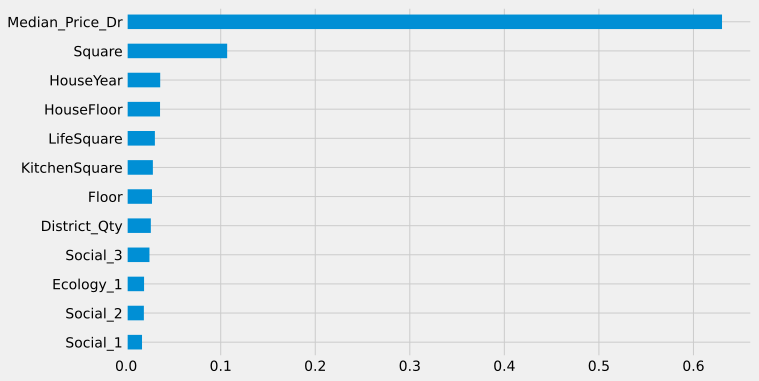

In [105]:
feat_importances.plot(kind = 'barh', figsize = (10, 6))

### Построение модели на тренировочных данных

In [106]:
parameters = [{'n_estimators': [100],
               'max_features': [5],
               'max_depth': [13]}]

In [107]:
model = GridSearchCV(estimator = RandomForestRegressor(random_state = 41),
                   param_grid = parameters,
                   scoring = 'r2',
                   cv = 5)

In [108]:
model.fit(X_train.loc[:, fts], y_train.values)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=41,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [109]:
def evaluate_model(df, model = model, fts = fts, calculate_r2 = 'Yes'):
    pred = model.predict(df.loc[:, fts])
    if calculate_r2 == 'Yes':
        r2_ = r2(df['Price'], pred)
        print('R2: {}'.format(r2_))
    return pred

### R2

In [110]:
pred_train = evaluate_model(X_train)

R2: 0.9247032551898979


In [111]:
pred_valid = evaluate_model(X_valid)

R2: 0.7644985862200855


### Test

In [112]:
test = preparation(test, healthcare_1_drop, distr_info, stat_dr, stat_r, median_price,\
                   median_square, median_lifesquare, median_kitchensquare)

In [113]:
test.to_csv('test_prepared.csv')

In [114]:
test['Price'] = evaluate_model(test, calculate_r2 = 'No')

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DistrictId            5000 non-null   object 
 1   Rooms                 5000 non-null   float64
 2   Square                5000 non-null   float64
 3   LifeSquare            5000 non-null   float64
 4   KitchenSquare         5000 non-null   float64
 5   Floor                 5000 non-null   int64  
 6   HouseFloor            5000 non-null   float64
 7   HouseYear             5000 non-null   int64  
 8   Ecology_1             5000 non-null   float64
 9   Social_1              5000 non-null   int64  
 10  Social_2              5000 non-null   int64  
 11  Social_3              5000 non-null   int64  
 12  Healthcare            5000 non-null   int64  
 13  Shops_1               5000 non-null   int64  
 14  District_Qty          5000 non-null   float64
 15  Is_Large          

In [116]:
test.describe()

Rooms       Square   LifeSquare  KitchenSquare        Floor  \
count  5000.00000  5000.000000  5000.000000    5000.000000  5000.000000   
mean      1.90780    55.663291    33.772060       5.524884     8.632000   
std       0.81008    17.025705    12.778183       3.836602     5.483228   
min       1.00000    16.319015    11.070513       0.000000     1.000000   
25%       1.00000    41.797963    22.014691       1.000000     4.000000   
50%       2.00000    52.615913    32.552134       6.000000     7.000000   
75%       2.00000    65.966581    42.300938       8.000000    12.000000   
max       6.00000   139.045763   115.328430      42.000000    78.000000   

        HouseFloor    HouseYear    Ecology_1     Social_1      Social_2  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean     13.378800  1984.392600     0.119874    24.933800   5406.900000   
std       6.113525    18.573149     0.120070    17.532202   4026.614773   
min       1.000000  1908.000000     0.000000     0.000000    168.000000   
25%       9.000000  1973.000000     0.019509     6.000000   1564.000000   
50%      14.000000  1977.000000     0.072158    25.000000   5285.000000   
75%      17.000000  2000.000000     0.195781    36.000000   7287.000000   
max      78.000000  2020.000000     0.521867    74.000000  19083.000000   

          Social_3  Healthcare      Shops_1  District_Qty     Is_Large  \
count  5000.000000  5000.00000  5000.000000   5000.000000  5000.000000   
mean      8.262600     1.31940     4.242800    235.416400     0.489800   
std      23.863762     1.47994     4.777365    265.903431     0.499946   
min       0.000000     0.00000     0.000000      1.000000     0.000000   
25%       0.000000     0.00000     1.000000     51.000000     0.000000   
50%       2.000000     1.00000     3.000000     97.000000     0.000000   
75%       5.000000     2.00000     6.000000    511.000000     1.000000   
max     141.000000     6.00000    23.000000    851.000000     1.000000   

       Median_Price_Dr  Median_Price_R  Median_Square  Median_LifeSquare  \
count      5000.000000     5000.000000    5000.000000        5000.000000   
mean     212153.793414   202876.550441      55.978961          32.519471   
std       73678.119792    49055.513768      14.989989          10.474392   
min       84250.557673   154979.497993      40.406590          21.663929   
25%      165683.084779   154979.497993      40.406590          21.663929   
50%      197806.428500   200320.754636      55.841812          32.552134   
75%      240748.194575   200320.754636      55.841812          32.552134   
max      593618.746096   455355.638212     116.084861          80.458910   

       Median_KitchenSquare  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
count           5000.000000  5000.000000  5000.000000  5000.000000   
mean               6.278000     0.009600     0.990400     0.029800   
std                0.563187     0.097518     0.097518     0.170052   
min                6.000000     0.000000     0.000000     0.000000   
25%                6.000000     0.000000     1.000000     0.000000   
50%                6.000000     0.000000     1.000000     0.000000   
75%                6.000000     0.000000     1.000000     0.000000   
max                9.000000     1.000000     1.000000     1.000000   

       Ecology_3_B    Shops_2_A    Shops_2_B          Price  
count  5000.000000  5000.000000  5000.000000    5000.000000  
mean      0.970200     0.082400     0.917600  215265.608530  
std       0.170052     0.275001     0.275001   77199.346275  
min       0.000000     0.000000     0.000000   66581.617753  
25%       1.000000     0.000000     1.000000  164479.156802  
50%       1.000000     0.000000     1.000000  195536.135805  
75%       1.000000     0.000000     1.000000  249076.792843  
max       1.000000     1.000000     1.000000  596914.834175

In [117]:
y_pred = test['Price'].values.tolist()

In [118]:
preds = pd.DataFrame()
preds['Id'] = test.index
preds['Price'] = y_pred
preds.head()

Id          Price
0    725  170067.265340
1  15856  238769.593717
2   5480  129740.133197
3  15664  307387.318630
4  14275  140950.840393

In [119]:
preds.to_csv('DZanorin_predictions', index = False)